## Importación de librerías

In [1]:
# Librerías estándar
import os
import warnings

# Manipulación de datos
import pandas as pd
import numpy as np

# Configuración de warnings
warnings.filterwarnings('ignore')

# Análisis de nulos
import missingno as msno

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Textos
import unicodedata
!pip install fuzzywuzzy
from fuzzywuzzy import process
import re

import scipy.stats as stats
from scipy.stats import chi2_contingency



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import sys

sys.path.append(r"C:\Data Analytics_Nuclio\TFM\Fintech\Fintech")

import Funciones_TFM as fun

## Carga de datos



In [4]:
path = "C:\Data Analytics_Nuclio\TFM\Fintech\Fintech\data\data"

# 2. Lista todos los archivos del directorio
lista = os.listdir(path)

# 3. Filtra solo los archivos .csv (opcional)
csv_files = [file for file in lista if (file.endswith('.csv') | file.endswith('.xlsx'))]

csv_files = sorted(csv_files)
csv_files

['bank-additional_bank-additional-full.csv']

In [5]:
diccionario_datos = {}

for file in csv_files:
  ruta = os.path.join(path, file)

  if file.endswith('.xlsx'):
    df = pd.read_excel(ruta)
  elif file.endswith('.csv'):
    df = pd.read_csv(ruta, sep = ';') 

  key = file.split('.')[0]
  diccionario_datos[key] = df
  print(f"{key}: {df.shape}")  # mostrar nombre y dimensiones

bank-additional_bank-additional-full: (41188, 21)


# 1. Entendimiento y análisis exploratorio de los datos

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 41,188 filas y 21 columnas.
##########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


----------------------------------------------------------------------------------------------------
¿Cuáles son las últimas cinco filas del conjunto de datos?


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


----------------------------------------------------------------------------------------------------
## Separación de columnas por tipo de datos

> Columnas Numéricas (10):


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0



> Columnas Categóricas (11):


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no


----------------------------------------------------------------------------------------------------
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
17537,44,services,divorced,high.school,no,yes,no,cellular,jul,mon,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32862,27,housemaid,married,basic.6y,no,no,no,cellular,may,mon,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,yes
27296,36,blue-collar,married,basic.9y,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
16080,35,services,single,high.school,unknown,no,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
36697,30,admin.,single,university.degree,no,no,no,cellular,jun,fri,...,2,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2,no


----------------------------------------------------------------------------------------------------
¿Cuáles son las columnas del conjunto de datos?
	- age
	- job
	- marital
	- education
	- default
	- housing
	- loan
	- contact
	- month
	- day_of_week
	- duration
	- campaign
	- pdays
	- previous
	- poutcome
	- emp.var.rate
	- cons.price.idx
	- cons.conf.idx
	- euribor3m
	- nr.employed
	- y
----------------------------------------------------------------------------------------------------
¿Cuál es el tipo de datos de cada columna?


,Tipo de Dato
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


----------------------------------------------------------------------------------------------------
¿Cuántas columnas hay de cada tipo de datos?
object     11
int64       5
float64     5
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 

,n_unique,valores_unicos
age,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5..."
job,12,"[housemaid, services, admin., blue-collar, tec..."
marital,4,"[married, single, divorced, unknown]"
education,8,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
default,3,"[no, unknown, yes]"
housing,3,"[no, yes, unknown]"
loan,3,"[no, yes, unknown]"
contact,2,"[telephone, cellular]"
month,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
day_of_week,5,"[mon, tue, wed, thu, fri]"


----------------------------------------------------------------------------------------------------
¿Cuáles son las estadísticas descriptivas básicas de todas las columnas?


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.0,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.0,41188.0,41188.0,41188,41188.0,41188.0,41188.0,41188.0,41188.0,41188
unique,,12,4,8,3,3,3,2,10,5,...,,,,3,,,,,,2
top,,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,,,,nonexistent,,,,,,no
freq,,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,,,,35563,,,,,,36548
mean,40.02406,,,,,,,,,,...,2.567593,962.475454,0.172963,,0.081886,93.575664,-40.5026,3.621291,5167.035911,
std,10.42125,,,,,,,,,,...,2.770014,186.910907,0.494901,,1.57096,0.57884,4.628198,1.734447,72.251528,
min,17.0,,,,,,,,,,...,1.0,0.0,0.0,,-3.4,92.201,-50.8,0.634,4963.6,
25%,32.0,,,,,,,,,,...,1.0,999.0,0.0,,-1.8,93.075,-42.7,1.344,5099.1,
50%,38.0,,,,,,,,,,...,2.0,999.0,0.0,,1.1,93.749,-41.8,4.857,5191.0,
75%,47.0,,,,,,,,,,...,3.0,999.0,0.0,,1.4,93.994,-36.4,4.961,5228.1,


----------------------------------------------------------------------------------------------------
¿Cuántos valores nulos hay en cada columna del DataFrame?


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

----------------------------------------------------------------------------------------------------
¿Cuál es el porcentaje de valores nulos por columna, ordenado de mayor a menor?


,Col,pct
0,age,0.0
1,job,0.0
2,marital,0.0
3,education,0.0
4,default,0.0
5,housing,0.0
6,loan,0.0
7,contact,0.0
8,month,0.0
9,day_of_week,0.0


----------------------------------------------------------------------------------------------------
## Valores nulos: Visualización


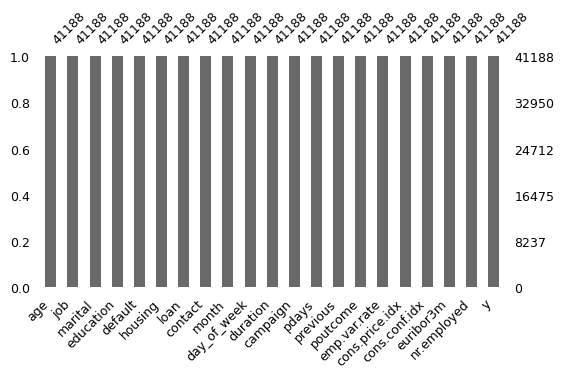

----------------------------------------------------------------------------------------------------
## Visualización de patrones en valores nulos


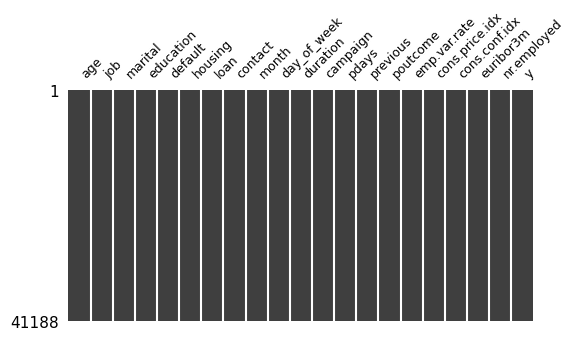

----------------------------------------------------------------------------------------------------


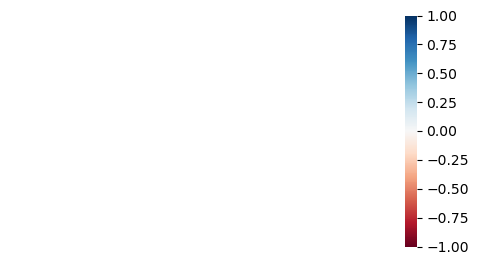

----------------------------------------------------------------------------------------------------
##########################################################################################


In [6]:
fun.exploracion_inicial(df)

In [7]:
# ¿Cuántos valores "desconocidos" hay en porcentaje?
(df == "unknown").mean().mul(100).round(2)

age                0.00
job                0.80
marital            0.19
education          4.20
default           20.87
housing            2.40
loan               2.40
contact            0.00
month              0.00
day_of_week        0.00
duration           0.00
campaign           0.00
pdays              0.00
previous           0.00
poutcome           0.00
emp.var.rate       0.00
cons.price.idx     0.00
cons.conf.idx      0.00
euribor3m          0.00
nr.employed        0.00
y                  0.00
dtype: float64

In [8]:
# ¿Cuántas filas hay duplicadas?
df.duplicated().sum()

np.int64(12)

In [9]:
# Mostramos qué filas son las duplicadas
df[df.duplicated(keep=False)]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [83]:
# Eliminación de las filas duplicadas
df = df.drop_duplicates()

## Datos demográficos

In [86]:
# Ordenamos los valores de las columnas "day_of_week" y "month" para que a nivel visual se lea mejor el dato
orden_dias = ["mon", "tue", "wed", "thu", "fri"]
orden_meses = ["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

In [87]:
# Incluimos el orden registrado en las variables correspondientes
df["day_of_week"] = pd.Categorical(df["day_of_week"], categories=orden_dias, ordered=True)
df["month"] = pd.Categorical(df["month"], categories=orden_meses, ordered=True)

In [88]:
# Definimos el segmento de "clientes" para que el código sea legible
segmento_clientes = ["job", "marital", "education", "default", "housing", "loan"]

#Llamamos a los graficos de forma organizada
print('### Entendimiento de las variables de clientes')
for col in segmento_clientes:
    fun.graficar_barras_relativo_px(df, col)

### Entendimiento de las variables de clientes


## Datos de campañas

### Campaña actual

In [89]:
# Definimos el segmento de "campaña actual" (categóricas y numéricas) para que el código sea legible
segmento_campana_actual_cat = ["contact", "month", "day_of_week"] # categóricas
segmento_campana_actual_num = ["duration", "campaign"] # numéricas

#Llamamos a los graficos de forma organizada
print('### Entendimiento de las variables de la campaña actual')
for col in segmento_campana_actual_cat:
    fun.graficar_barras_relativo_px(df, col)

### Entendimiento de las variables de la campaña actual


### Campaña previa

In [90]:
# Definimos el segmento de "campaña previa" (categóricas y numéricas) para que el código sea legible
segmento_campana_previa_cat = ["poutcome"] # categóricas
segmento_campana_previa_num = ["pdays", "previous"] # numéricas

#Llamamos a los graficos de forma organizada
print('### Entendimiento de las variables de la campaña previa')
for col in segmento_campana_previa_cat:
    fun.graficar_barras_relativo_px(df, col)

### Entendimiento de las variables de la campaña previa


## Datos macroeconómicos

In [91]:
macro_cols = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

df_macro = df[macro_cols + ["y", "month"]].copy()

In [92]:
df_macro[macro_cols].describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,1.570883,0.578839,4.627860,1.734437,72.251364
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [93]:
df_macro[macro_cols].nunique().sort_values()

emp.var.rate       10
nr.employed        11
cons.conf.idx      26
cons.price.idx     26
euribor3m         316
dtype: int64

In [94]:
df_macro.groupby("month")[macro_cols].mean()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
month,,,,,
mar,-1.800000,93.097330,-42.650549,1.162745,5055.390110
apr,-1.800000,93.119575,-46.273318,1.361047,5093.121437
may,-0.164945,93.528894,-40.579168,3.293696,5149.522242
jun,0.688379,94.245402,-41.579428,4.256908,5197.493193
jul,1.159353,93.895109,-42.371209,4.686026,5214.089985
aug,0.746940,93.311022,-35.597021,4.300408,5200.239330
sep,-2.177368,93.346474,-33.893158,0.834760,4988.847895
oct,-2.437238,93.176145,-34.591632,1.200762,5018.825662
nov,-0.418561,93.200944,-41.238561,3.723018,5173.025683


In [95]:
corr = df_macro[macro_cols].corr(method="pearson")
corr

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
emp.var.rate,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,0.906949,0.521945,0.100679,0.945146,1.000000


Se observa una fuerte colinealidad entre emp.var.rate, euribor3m y nr.employed (r > 0.90), lo que sugiere que capturan un componente macroeconómico común y probablemente relacionado con el periodo temporal del dataset. cons.price.idx mantiene correlaciones moderadas con este bloque, mientras que cons.conf.idx presenta correlaciones bajas con el resto, aportando información más independiente.

In [96]:
df_macro = df[macro_cols + ["y", "month"]].copy()

# y a 0/1
df_macro["y_bin"] = df_macro["y"].astype(str).str.lower().map({"no": 0, "yes": 1})

# month categórica ordenada
df_macro["month"] = pd.Categorical(df_macro["month"], categories=orden_meses, ordered=True)

In [97]:
macro_mes_mean = df_macro.groupby("month")[macro_cols].mean()
macro_mes_median = df_macro.groupby("month")[macro_cols].median()

macro_mes_mean, macro_mes_median

(       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
 month                                                                     
 mar       -1.800000       93.097330     -42.650549   1.162745  5055.390110
 apr       -1.800000       93.119575     -46.273318   1.361047  5093.121437
 may       -0.164945       93.528894     -40.579168   3.293696  5149.522242
 jun        0.688379       94.245402     -41.579428   4.256908  5197.493193
 jul        1.159353       93.895109     -42.371209   4.686026  5214.089985
 aug        0.746940       93.311022     -35.597021   4.300408  5200.239330
 sep       -2.177368       93.346474     -33.893158   0.834760  4988.847895
 oct       -2.437238       93.176145     -34.591632   1.200762  5018.825662
 nov       -0.418561       93.200944     -41.238561   3.723018  5173.025683
 dec       -2.846154       92.715363     -33.708791   0.865319  5031.895604,
        emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
 month     

In [98]:
df_macro.groupby("month")[macro_cols].nunique()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
month,,,,,
mar,1,2,2,37,2
apr,1,2,2,29,2
may,2,3,3,35,3
jun,3,3,3,44,3
jul,3,3,3,51,3
aug,3,3,3,39,3
sep,2,2,2,31,2
oct,3,3,3,48,3
nov,3,3,3,38,3


In [99]:
conv_mes = df_macro.groupby("month")["y_bin"].mean() * 100
conv_mes

month
mar    50.549451
apr    20.486507
may     6.435680
jun    10.511470
jul     9.038918
aug    10.605570
sep    44.912281
oct    43.933054
nov    10.146341
dec    48.901099
Name: y_bin, dtype: float64

In [100]:
# tamaño de muestra por mes
n_mes = df_macro.groupby("month").size()

# construir resumen mensual
resumen_mes = macro_mes_mean.copy()
resumen_mes["conversion_%"] = conv_mes
resumen_mes["n_muestra"] = n_mes

resumen_mes

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,conversion_%,n_muestra
month,,,,,,,
mar,-1.800000,93.097330,-42.650549,1.162745,5055.390110,50.549451,546
apr,-1.800000,93.119575,-46.273318,1.361047,5093.121437,20.486507,2631
may,-0.164945,93.528894,-40.579168,3.293696,5149.522242,6.435680,13767
jun,0.688379,94.245402,-41.579428,4.256908,5197.493193,10.511470,5318
jul,1.159353,93.895109,-42.371209,4.686026,5214.089985,9.038918,7169
aug,0.746940,93.311022,-35.597021,4.300408,5200.239330,10.605570,6176
sep,-2.177368,93.346474,-33.893158,0.834760,4988.847895,44.912281,570
oct,-2.437238,93.176145,-34.591632,1.200762,5018.825662,43.933054,717
nov,-0.418561,93.200944,-41.238561,3.723018,5173.025683,10.146341,4100


In [101]:
cols_corr = macro_cols + ["conversion_%"]   # solo macros + target mensual
corr_mes_spearman = resumen_mes[cols_corr].corr(method="spearman")["conversion_%"].sort_values(ascending=False)
corr_mes_spearman

conversion_%      1.000000
cons.conf.idx     0.236364
nr.employed      -0.721212
cons.price.idx   -0.733333
emp.var.rate     -0.747724
euribor3m        -0.781818
Name: conversion_%, dtype: float64

Correlación positiva: cuando la variable macro sube en ese mes, suele subir la conversión mensual.

Negativa: cuando sube la macro, baja la conversión.

Ojo: aquí tenemos muy pocos puntos (meses), así que se interpreta como indicio, no prueba.

In [102]:
# Conversión por mes
fig = px.line(conv_mes.reset_index(name="conversion_%"), x="month", y="conversion_%", markers=True,
              title="Conversión (%) por mes")
fig.show()

# Ejemplo: euribor3m por mes
fig2 = px.line(macro_mes_mean.reset_index(), x="month", y="euribor3m", markers=True,
               title="euribor3m medio por mes")
fig2.show()

In [103]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Asegurar que el índice (month) está ordenado como categórica
orden_meses = ["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

conv_plot = conv_mes.copy()
eur_plot = macro_mes_mean["euribor3m"].copy()

# Reindex para forzar el orden
conv_plot = conv_plot.reindex(orden_meses)
eur_plot = eur_plot.reindex(orden_meses)

# Figura con doble eje Y
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Conversión (izquierda)
fig.add_trace(
    go.Scatter(
        x=conv_plot.index,
        y=conv_plot.values,
        mode="lines+markers",
        name="Conversión (%)"
    ),
    secondary_y=False
)

# Euribor (derecha) en rojo
fig.add_trace(
    go.Scatter(
        x=eur_plot.index,
        y=eur_plot.values,
        mode="lines+markers",
        name="Euribor 3m",
        line=dict(color="#EF553B")
    ),
    secondary_y=True
)

fig.update_layout(
    title="Conversión (%) y Euribor 3m por mes",
    xaxis_title="Mes",
    legend_title="Series",
    plot_bgcolor="white"
)

fig.update_yaxes(title_text="Conversión (%)", secondary_y=False, showgrid=True, gridcolor="lightgrey")
fig.update_yaxes(title_text="Euribor 3m", secondary_y=True, showgrid=False)

fig.show()

#### Interpretación: Conversión (%) y Euribor 3m por mes

Este gráfico compara, **mes a mes**, la **tasa de conversión** (línea azul) con el **Euribor a 3 meses** (línea roja).  
La idea es ver si el contexto de **tipos de interés** podría estar asociado a cambios en la probabilidad de contratación del depósito.

**Qué se observa (patrones comparados):**
- **Euribor alto (mayo–agosto) → conversión baja**  
  En este tramo el Euribor sube fuerte (≈ 3.3–4.7) y la conversión se mantiene baja (≈ **6%–11%**).
- **Euribor muy bajo (septiembre–octubre) → conversión muy alta**  
  Tras la caída del Euribor (≈ 0.83–1.20), la conversión sube claramente (≈ **44%–45%**).
- **Rebote del Euribor (noviembre) → conversión baja**  
  Cuando el Euribor vuelve a subir (≈ 3.72), la conversión cae otra vez (≈ **10%**).
- **Euribor bajo (diciembre) → conversión muy alta**  
  Con Euribor bajo (≈ 0.87), la conversión vuelve a niveles muy altos (≈ **49%**).

**Lectura lógica (por qué puede pasar):**
- A simple vista aparece una **relación inversa**: cuando el **Euribor está alto**, la conversión tiende a ser **más baja**; cuando el **Euribor baja**, la conversión tiende a **subir**.
- Ojo: aquí puede haber también **estacionalidad** (momentos del año con campañas más efectivas) y/o **efecto composición** (no se contacta al mismo tipo de cliente cada mes).

**Conclusión rápida:**
- El gráfico sugiere que **Euribor3m es una variable relevante de contexto temporal** y podría estar asociada a la conversión.
- Aun así, esto es **exploratorio**: el gráfico muestra **coincidencias temporales**, no causalidad.

**Idea accionable (si esto fuera una campaña / análisis):**
- Validar la hipótesis con el **tamaño de muestra por mes** (n_muestra), porque meses con muy poco volumen pueden inflar porcentajes.
- Complementar con un análisis a nivel individual (p. ej., un modelo/logit con `euribor3m` + variables operativas como `contact`, `campaign`, `duration`, `poutcome`), para separar:
  - efecto **macro** (tipos de interés),
  - de efecto **operativo/segmentación** (a quién se contactó y cómo).

## Resultado/Conversión global de contratación del depósito

In [104]:
fun.graficar_barras_relativo_px(df, "y")

# 2. Análisis de la respuesta de campañas

Para cada analisis de variable hemos plasmado, a través de gráficos, la proporción de clientes que **contratan ("y" = yes: rojo)** vs **no contratan ("y" = no: morado)** según el tipo de variable.

**Línea discontinua (media global):**
- La línea horizontal negra discontínua representa la **tasa de conversión global del dataset: 11.27%**.
- Sirve como referencia para ver qué categorías están **por encima** o **por debajo** de la media.

## 2.1 Respuesta según perfil del cliente

### 2.1.1 Edad ("age") vs contratación ("y")

In [105]:
# Distribución de la variable "age"
df.groupby("y")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36537.0,39.910994,9.897176,17.0,32.0,38.0,47.0,95.0
yes,4639.0,40.912266,13.838838,17.0,31.0,37.0,50.0,98.0


In [106]:
# Creación y conversión por grupos
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ["<=25", "26-35", "36-45", "46-55", "56-65", "66+"]

df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)

df.groupby("age_group")["y"].value_counts(normalize=True).mul(100).round(2)


age_group  y  
<=25       no     79.04
           yes    20.96
26-35      no     88.28
           yes    11.72
36-45      no     91.49
           yes     8.51
46-55      no     91.31
           yes     8.69
56-65      no     84.78
           yes    15.22
66+        no     53.07
           yes    46.93
Name: proportion, dtype: float64

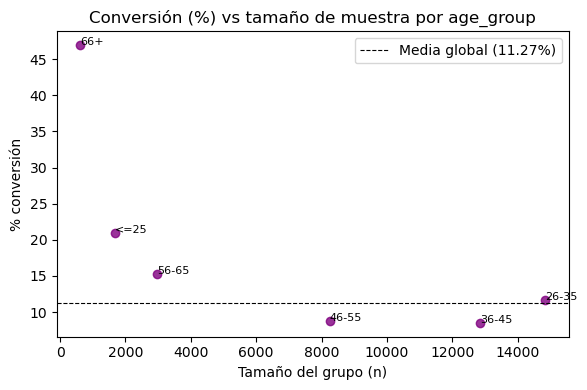

In [107]:
# Creación de los gráficos
fun.graficar_barras_resultado_por_categoria(df, "age_group", target="y", modo="stack",titulo = "Distribución de contrataciones por edad")
fun.scatter_conversion_vs_size(df,'age_group', point_color='purple')


**Interpretación del resultado: conversión ("y") vs grupos de edad ("age_group") con la media global**

**Qué se observa?**
- La variable `age_group` **muestra una relación no lineal** con la conversión. Aunque los grupos más jóvenes **(<=25)** y de mayor edad **(66+)** presentan tasas de contratación elevadas, su reducido tamaño muestral limita su impacto global y aconseja interpretar estos resultados con cautela.
- Por el contrario, los rangos de edad intermedios, especialmente **26–35 años**, combinan un volumen elevado con una conversión ligeramente superior a la media (11.72%), lo que los convierte en un segmento especialmente relevante desde el punto de vista del impacto agregado.
- Los grupos **36–55**, pese a su elevado peso en la muestra, presentan tasas de conversión consistentemente inferiores.

**Conclusión rápida:**  
- `age_group` es una variable **potencialmente muy relevante**, pero el caso de **66+** requiere validación por volumen y posibles sesgos (no asumir causalidad directa).

**Idea accionable (si esto fuera una campaña):**
- Priorizar/optimizar mensajes para segmentos con mejor rendimiento: **18–25** y **56–65**.
- Tratar **66+** como “segmento premium” pero con control:  
  revisar el **tamaño de muestra**, estabilidad por mes/canal, y si hay variables que lo expliquen (p. ej., `contact`, `poutcome`, `campaign`, `duration`).
- Para modelado: mantener `age_group` (o incluso usar `age` numérica con no-linealidad: binning, splines o árboles) porque la señal no parece lineal.


### 2.1.2 Ocupación ("job") vs contratación ("y")

In [108]:
# Conversión por grupos
df.groupby("job")["y"].value_counts(normalize=True).mul(100).round(2).to_frame(name="porcentaje")

porcentaje
job           y              
admin.        no        87.03
              yes       12.97
blue-collar   no        93.10
              yes        6.90
entrepreneur  no        91.48
              yes        8.52
housemaid     no        90.00
              yes       10.00
management    no        88.78
              yes       11.22
retired       no        74.74
              yes       25.26
self-employed no        89.51
              yes       10.49
services      no        91.86
              yes        8.14
student       no        68.57
              yes       31.43
technician    no        89.17
              yes       10.83
unemployed    no        85.80
              yes       14.20
unknown       no        88.79
              yes       11.21

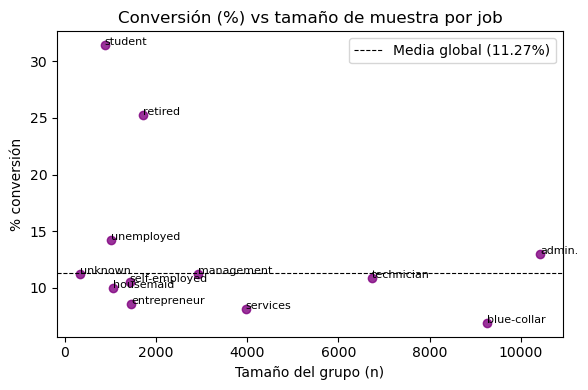

In [109]:
# Creación de los gráficos
fun.graficar_barras_resultado_por_categoria(df, "job", target="y", modo="stack",titulo = "Distribución de contrataciones por ocupación (job)")
fun.scatter_conversion_vs_size(df,'job', point_color='purple')

**Interpretación del resultado: conversión ("y") vs ocupación ("job") con la media global**

**Qué se observa?**
- La variable `job`presenta diferencias relevantes en la tasa de conversión entre los distintos grupos profesionales. Aunque algunas categorías como `student` y `retired` muestran tasas de contratación elevadas, su reducido tamaño muestral limita su impacto global y aconseja interpretar estos resultados con cautela.
- Resulta más relevante observar el comportamiento de las categorías con mayor representatividad. En este sentido, el grupo `admin.`, uno de los más numerosos, presenta una tasa de conversión ligeramente superior a la media global, mientras que `blue-collar`, también altamente representativo, muestra una conversión claramente inferior.

**Conclusión rápida:**
- La variable `job` sí parece aportar señal: hay diferencias claras de conversión entre ocupaciones.
- Para decisiones de campaña, **student** y **retired** serían perfiles “prioritarios” (alta conversión), mientras que **blue-collar / services / entrepreneur** podrían requerir un enfoque distinto (mensaje, oferta o canal) porque convierten menos.

**Nota de cautela (importante):**
- Algunas categorías pueden tener **tamaños de muestra distintos**. Si un grupo tiene pocos casos, su porcentaje puede ser más inestable. Por eso conviene mirar también el volumen de cada categoría antes de sacar conclusiones definitivas.

### 2.1.3 Estado civil ("marital") vs contratación ("y")

In [110]:
# Conversión por grupos en porcentaje
df.groupby("marital")["y"].value_counts(normalize=True).mul(100).round(2).to_frame(name="porcentaje")

porcentaje
marital  y              
divorced no        89.68
         yes       10.32
married  no        89.84
         yes       10.16
single   no        85.99
         yes       14.01
unknown  no        85.00
         yes       15.00

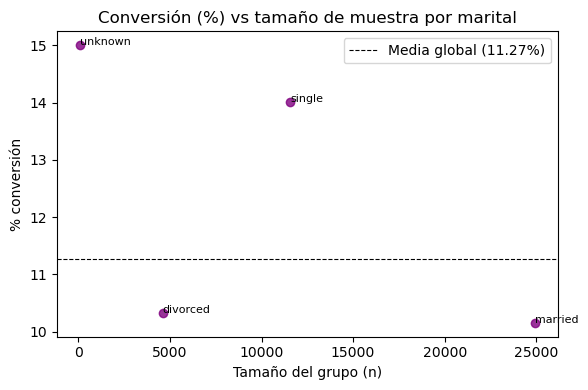

In [111]:
# Creación de los gráficos
fun.graficar_barras_resultado_por_categoria(df, "marital", target="y", modo="stack",titulo = "Distribución de contrataciones por estado civil")
fun.scatter_conversion_vs_size(df,'marital', point_color='purple')

**Interpretación del resultado: conversión ("y") vs estado civil ("marital") con la media global**

**Qué se observa?**
- La variable `marital`muestra diferencias de conversión reducidas entre los distintos estados civiles.
- Aunque el grupo de personas solteras (**single**) presenta una tasa de contratación ligeramente superior a la media global, las diferencias respecto a los grupos **married** y **divorced** son moderadas y no parecen lo suficientemente marcadas como para considerar esta variable como altamente discriminante. 
- El segmento **unknown** presenta una conversión elevada, pero su reducido tamaño muestral limita su representatividad.

**Conclusión rápida:**
- `marital` aporta **algo de señal**, pero las diferencias son **moderadas**.
- El grupo **single** destaca como el segmento más favorable (con diferencia clara vs media).
- El grupo **unknown** no lo tomaría como insight sólido sin confirmar primero el volumen (n) y, si es posible, revisar si hay sesgo en ese registro.

**Nota de cautela (importante):**
- Dado que las diferencias observadas son pequeñas y que los grupos con mayor volumen presentan tasas de conversión cercanas a la media global, la variable `marital` debe interpretarse con cautela y en combinación con otras características del cliente. Por sí sola, no parece explicar de forma significativa la decisión de contratación.

**Idea accionable (si esto fuera una campaña):**
- Priorizar / testar mensajes para **single**, y mantener el resto como baseline porque las diferencias entre **married** y **divorced** son pequeñas.

### 2.1.4 Nivel educativo ("education") vs contratación ("y")

In [112]:
# Conversión por grupos en porcentaje
df.groupby("education")["y"].value_counts(normalize=True).mul(100).round(2).to_frame(name="porcentaje")

porcentaje
education           y              
basic.4y            no        89.75
                    yes       10.25
basic.6y            no        91.79
                    yes        8.21
basic.9y            no        92.18
                    yes        7.82
high.school         no        89.16
                    yes       10.84
illiterate          no        77.78
                    yes       22.22
professional.course no        88.65
                    yes       11.35
university.degree   no        86.28
                    yes       13.72
unknown             no        85.49
                    yes       14.51

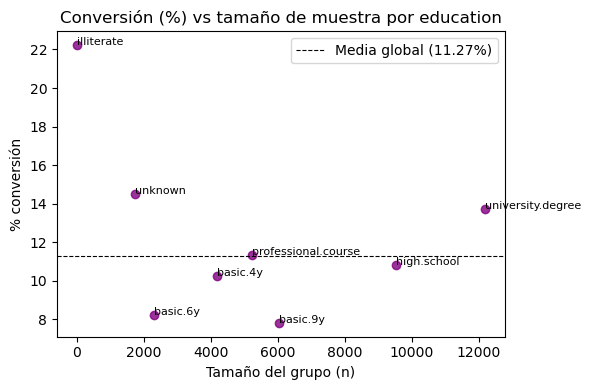

In [113]:
# Creación de los gráficos
fun.graficar_barras_resultado_por_categoria(df, "education", target="y", modo="stack",titulo = "Distribución de contrataciones por educación")
fun.scatter_conversion_vs_size(df,'education', point_color='purple')

**Interpretación del resultado: conversión ("y") vs educación ("education") con la media global**

**¿Qué se observa?**
- El grupo **university.degree** destaca como uno de los segmentos más relevantes, al combinar un volumen elevado con una conversión superior a la media global. 
- Por el contrario, los niveles educativos básicos (**basic.4y, basic.6y y basic.9y**) presentan tasas de conversión consistentemente inferiores, lo que sugiere una menor propensión a la contratación en estos segmentos.

**Conclusión rápida:**
- La variable `education` muestra una relación clara con la conversión cuando se analiza conjuntamente la tasa de contratación y el tamaño muestral.  
- En conjunto, se observa una **tendencia** en la que niveles educativos más altos se asocian con una mayor probabilidad de conversión, especialmente en los grupos con mayor representatividad. 

**Nota de cautela (importante):**
- Las categorías **illiterate** y **unknown** deben interpretarse con cautela. En el primer caso, el tamaño muestral extremadamente reducido puede generar porcentajes inflados y poco estables. En el segundo, se trata de una categoría heterogénea que puede agrupar perfiles muy distintos. Por ello, los resultados asociados a estas categorías no deben considerarse concluyentes ni extrapolables sin un análisis adicional.

**Idea accionable (si esto fuera una campaña):**
- Segmentar o personalizar mensajes priorizando **`university.degree`** (y quizá `professional.course`), y revisar si los segmentos `basic.*` necesitan un enfoque distinto (mensaje más simple, más confianza/beneficios concretos, etc.).

### 2.1.5 Default vs contratación ("y")

In [114]:
# Conversión por grupos en porcentaje
df.groupby("default")["y"].value_counts(normalize=True).mul(100).round(2).to_frame(name="porcentaje")

porcentaje
default y              
no      no        87.12
        yes       12.88
unknown no        94.85
        yes        5.15
yes     no       100.00

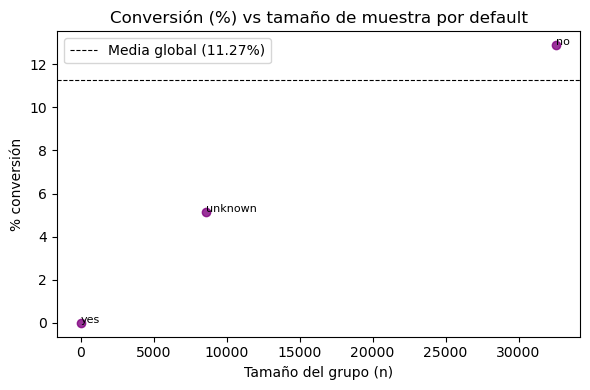

In [115]:
# Creación de los gráficos
fun.graficar_barras_resultado_por_categoria(df, "default", target="y", modo="stack",titulo = "Distribución de contrataciones por impagos")
fun.scatter_conversion_vs_size(df,'default', point_color='purple')

**Interpretación del resultado: conversión ("y") vs "default"con la media global**

**¿Qué se observa?**
- Los clientes sin impagos (**default = no**) presentan una conversión superior a la media global y constituyen un segmento informativo y estable debido a su elevado volumen. 
- La categoría **unknown** se asocia a una conversión significativamente inferior, lo que sugiere que la ausencia de información sobre impagos no es neutra y puede estar capturando perfiles menos cualificados o con menor calidad de registro. 
- El grupo **default = yes** no puede interpretarse de forma fiable debido a su tamaño muestral extremadamente reducido.

**Conclusión rápida:**
- La variable `default` muestra diferencias relevantes en la tasa de conversión, especialmente entre las categorías **no** y **unknown**.
- El valor **`unknown`** es una señal de alerta: se asocia a una conversión mucho menor y conviene revisarlo (qué significa exactamente y por qué falta el dato).
- No se puede interpretar el grupo **`yes`** con fiabilidad por el **bajo volumen**.

**Nota de cautela (importante):**
- La categoría **unknown** debe interpretarse con cautela, ya que puede reflejar tanto falta de información como decisiones de filtrado en campañas previas. No obstante, su comportamiento claramente diferenciado respecto a **default = no** indica que no debe tratarse como una categoría neutra en el análisis ni en el modelado. Revisar si conviene imputar/limpiar esa variable en función del contexto del dataset.

### 2.1.6 Hipoteca ("housing") vs contratación ("y")

In [116]:
# Conversión por grupos en porcentaje
df.groupby("housing")["y"].value_counts(normalize=True).mul(100).round(2).to_frame(name="porcentaje")

porcentaje
housing y              
no      no        89.12
        yes       10.88
unknown no        89.19
        yes       10.81
yes     no        88.38
        yes       11.62

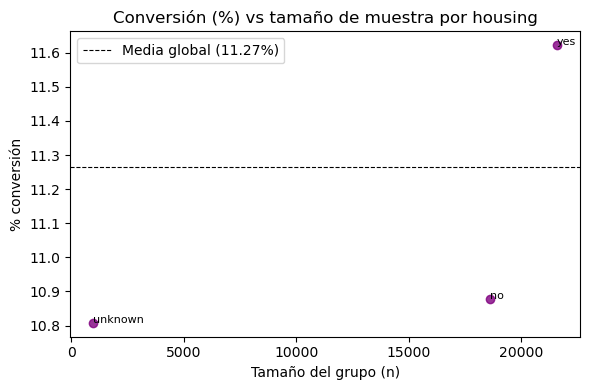

In [117]:
# Creación de los gráficos
fun.graficar_barras_resultado_por_categoria(df, "housing", target="y", modo="stack",titulo = "Distribución de contrataciones por si tienen hipoteca o no")
fun.scatter_conversion_vs_size(df,'housing', point_color='purple')

**Interpretación del resultado: conversión ("y") vs si tienen hipoteca o no ("housing") con la media global**

**¿Qué se observa?**
- **housing = yes → 11.62%**  
  Conversión **ligeramente por encima** de la media. La diferencia es pequeña, pero sugiere que quienes tienen hipoteca podrían estar **ligeramente** más predispuestos a contratar.
- **housing = no → 10.88%**  
  Conversión **ligeramente por debajo** de la media. No es una caída grande, pero queda por debajo del promedio.
- **housing = unknown → 10.81%**  
  Conversión **por debajo** de la media. Aquí conviene ser prudente porque suele ser un grupo menos fiable (y normalmente con menos muestra), por lo que puede representar **falta de información** más que un perfil real.

**Conclusión rápida:**
- `housing` parece una variable con **señal débil**: las tasas están muy cerca entre sí (diferencias pequeñas).
- La lectura más consistente es que **tener hipoteca** se asocia a una conversión **ligeramente superior** a la media global, pero no lo suficiente como para considerarlo un driver fuerte por sí solo.
- `unknown` se comporta parecido a `no`, y conviene interpretarlo como una categoría **no neutra** (posible calidad de dato/registro incompleto).

**Nota de cautela (importante):**
- Dado que las diferencias observadas entre las categorías de `housing` son pequeñas incluso en los grupos con mayor volumen, esta variable debe interpretarse con cautela y no asumirse como un predictor fuerte de la conversión. La categoría **unknown** no se comporta como neutra y podría reflejar problemas de calidad del dato o registros incompletos, por lo que conviene tratarla como una categoría diferenciada en el análisis y el modelado.

**Idea accionable (si esto fuera una campaña):**
- No segmentaría la estrategia solo por `housing`, pero sí lo usaría como **variable de apoyo** combinada con otras (por ejemplo `loan`, `job`, `age`, `poutcome`).
- Para modelado, mantener `unknown` como categoría separada (no imputarla automáticamente como `no`) y, si es posible, **investigar por qué falta ese dato** (origen del canal, errores de captura, etc).

### 2.1.7 Préstamo personal ("loan") vs contratación ("y")

In [118]:
# Conversión por grupos en porcentaje
df.groupby("loan")["y"].value_counts(normalize=True).mul(100).round(2).to_frame(name="porcentaje")

porcentaje
loan    y              
no      no        88.66
        yes       11.34
unknown no        89.19
        yes       10.81
yes     no        89.07
        yes       10.93

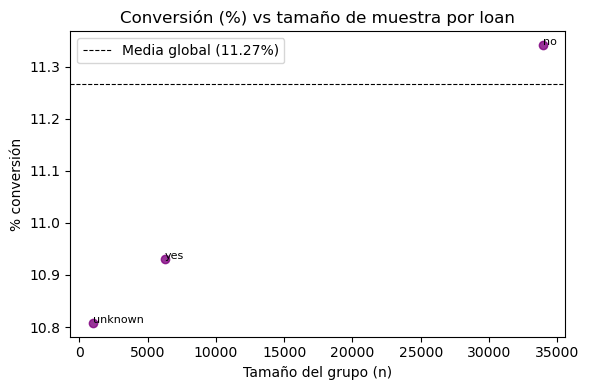

In [119]:
# Creación de los gráficos
fun.graficar_barras_resultado_por_categoria(df, "loan", target="y", modo="stack",titulo = "Distribución de contrataciones por si tienen préstamo personal o no")
fun.scatter_conversion_vs_size(df,'loan', point_color='purple')

**Interpretación del resultado: conversión ("y") vs si tienen préstamo personal o no ("loan") con la media global**

**Qué se observa (comparado con la media):**
- **loan = no → 11.34%**  
  Conversión **muy ligeramente por encima** de la media. Es el grupo con mayor volumen, por lo que es el más estable para sacar conclusiones.
- **loan = yes → 10.93%**  
  Conversión **ligeramente por debajo** de la media. Sugiere que tener un préstamo personal activo podría estar asociado a una **menor predisposición** a contratar, aunque la diferencia es pequeña.
- **loan = unknown → 10.81%**  
  Conversión **por debajo** de la media. De nuevo, “unknown” suele reflejar **falta de información** o variaciones en la captura del dato, por lo que conviene tratarlo como categoría propia y no como neutra.

**Conclusión rápida:**
- La variable `loan` muestra diferencias muy reducidas en la tasa de conversión entre sus categorías. Tanto los clientes con préstamo personal como aquellos sin él presentan tasas de contratación muy próximas a la media global, incluso en los grupos con mayor volumen. En consecuencia, loan no parece constituir un factor determinante en la decisión de contratación del depósito.
- Las diferencias son **pequeñas**, así que por sí sola no es una variable “decisiva”, pero sí puede sumar cuando la combines con otras (p. ej., `housing`, `job`, `age`, `poutcome`).

**Idea accionable (si esto fuera una campaña):**
- No tomaría decisiones fuertes solo por `loan`, pero sí lo usaría para **micro-segmentación**:
  - Priorizar (ligeramente) audiencias con `loan=no` si tienes que optimizar presupuesto/tiempo de contacto.
  - Mantener `loan=unknown` separado y revisar si el “unknown” proviene de un canal/captura específica (posible mejora de calidad de datos).
- Para modelado: mantener `unknown` como categoría propia y evaluar interacciones (`loan` + `housing` + variables de campaña).

## 2.2 Respuesta según características de la campaña actual

### 2.2.1 Tipo de canal ("contact") vs contratación ("y")

In [120]:
# Conversión por grupos en porcentaje
df.groupby("contact")["y"].value_counts(normalize=True).mul(100).round(2).to_frame(name="porcentaje")

porcentaje
contact   y              
cellular  no        85.26
          yes       14.74
telephone no        94.77
          yes        5.23

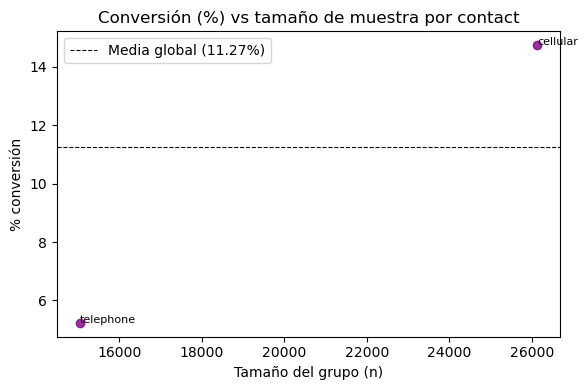

In [121]:
# Creación de los gráficos
fun.graficar_barras_resultado_por_categoria(df, "contact", target="y", modo="stack", titulo = "Distribucion de contrataciones por tipología de canal")
fun.scatter_conversion_vs_size(df,'contact', point_color='purple')

**Interpretación del resultado: Conversión ("y") vs tipo de canal ("contact") con la media global**

**¿Qué se observa?**
- **`cellular`** tiene una conversión de **14.74% ("yes": 3,853 personas)** → está **por encima** de la media global (11.27%).
- **`telephone`** tiene una conversión de **5.23% ("yes": 787 personas)** → está **por debajo** de la media global.

**Conclusión rápida:**
- El canal **`cellular`** se asocia con **mejor rendimiento** (mayor probabilidad de “yes”) que `telephone`. El canal `cellular`no solo representa la muestra más alta si no que **su eficacia es casi 3 veces superior a la del telefono fijo.**
- El canal **`telephone`**es altamente ineficiente para esta campaña.
- `contact` parece ser una variable relevante para explicar diferencias en conversión.

**Nota de contexto:**
- Es un análisis descriptivo: no prueba causalidad. La diferencia puede depender de segmentación, timing o estrategia de contacto.

### 2.2.2 Mes ("month") vs contratación ("y")

In [122]:
# Conversión por grupos en porcentaje
df.groupby("month")["y"].value_counts(normalize=True).mul(100).round(2).to_frame(name="porcentaje")

porcentaje
month y              
mar   yes       50.55
      no        49.45
apr   no        79.51
      yes       20.49
may   no        93.56
      yes        6.44
jun   no        89.49
      yes       10.51
jul   no        90.96
      yes        9.04
aug   no        89.39
      yes       10.61
sep   no        55.09
      yes       44.91
oct   no        56.07
      yes       43.93
nov   no        89.85
      yes       10.15
dec   no        51.10
      yes       48.90

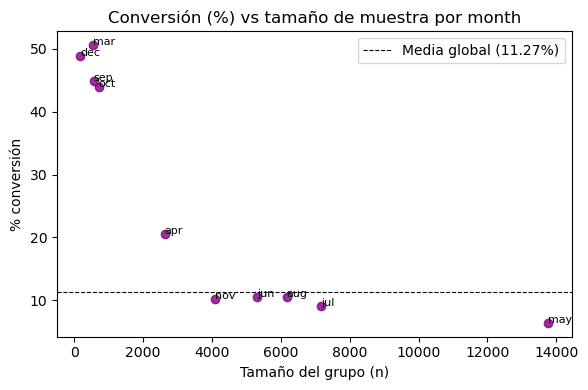

In [123]:
# Creación de los gráficos
fun.graficar_barras_resultado_por_categoria(df, "month", target="y", modo="stack", titulo = "Tasa de conversión según mes del ultimo contacto")
fun.scatter_conversion_vs_size(df,'month', point_color='purple')

**Interpretación del resultado: Conversión ("y") vs mes ("month") con la media global**

**¿Qué se observa? (patrones de éxito vs volumen)**
- Picos de conversión **muy por encima** de la media:
  - **marzo (~50.55%)**, **septiembre (~44.91%)**, **octubre (~43.87%)**, **diciembre (~48.90%)**.
- Hay meses con conversión **claramente por debajo** de la media:
  - **mayo (~6.43%)**, **julio (~9.05%)**, **noviembre (~10.14%)** (y también **junio/agosto** cerca pero por debajo o muy cerca).
- En meses como **mayo** el volumen total es alto (muchos contactos), pero la conversión es baja, lo que sugiere que **no solo importa el número de contactos**, sino el contexto del mes.

**Conclusión rápida: estacionalidad marcada**
- La variable `month` parece estar **muy relacionado** con la probabilidad de “yes”, es decir, con el éxito de la campaña.
- Esto podría reflejar factores como timing de campañas, comportamiento del cliente por temporada o condiciones macroeconómicas asociadas a ciertos meses.

**Nota importante:**
- Para interpretar bien el éxito de los siguientes meses (mar/sep/oct/dec), conviene mirar también el **tamaño de muestra por mes (n)** (ej: solo hubo 93 contactos en diciembre frente a los 12,883 en mayo). Estos porcentajes pueden estar sesgados.


**Dado que el dataset no incluye información temporal detallada (fecha exacta del contacto o de la conversión), el análisis se centra en patrones de estacionalidad y de intensidad de contacto, sin poder inferir relaciones temporales directas ni tiempos de respuesta del cliente.**

### 2.2.3 Día de la semana ("day_of_week) vs contratación ("y")

In [124]:
# Conversión por grupos en porcentaje
df.groupby("day_of_week")["y"].value_counts(normalize=True).mul(100).round(2).to_frame(name="porcentaje")

porcentaje
day_of_week y              
mon         no        90.05
            yes        9.95
tue         no        88.21
            yes       11.79
wed         no        88.33
            yes       11.67
thu         no        87.89
            yes       12.11
fri         no        89.19
            yes       10.81

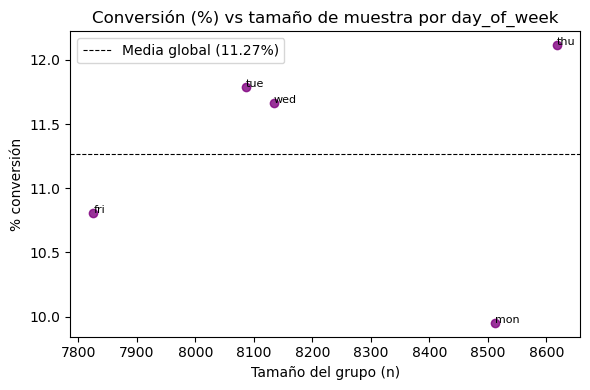

In [125]:
# Creación de los gráficos
fun.graficar_barras_resultado_por_categoria(df, "day_of_week", target="y", modo="stack", titulo = "Distribucion de contrataciones por día de la semana")
fun.scatter_conversion_vs_size(df,'day_of_week', point_color='purple')

**Interpretación del resultado: Conversión ("y") vs día de la semana ("day_of_week") con la media global**

**¿Qué se observa?**
- **Estabilidad general**: Las tasas de conversión están bastante estables entre los diferentes días laborables (no hay diferencias grandes).
- Días **ligeramente por encima** de la media:
  - **jueves ~12.12%**, **martes ~11.78%**, **miércoles ~11.67%**.
- Días **por debajo** de la media:
  - **lunes ~9.95%** (el más bajo), **viernes ~10.81%**.

**Conclusión rápida:**
- `day_of_week` parece tener un **impacto moderado/bajo** en la conversión: hay pequeñas variaciones, pero no cambios fuertes.
- Si se tuviera que priorizar por rendimiento,el **jueves** (y después martes y miércoles) aparece como el día con mayor receptividad, mientras que **lunes** es el más flojo.

**Nota importante:**
- Aunque la diferencia es pequeña entre los diferentes días de la semana, puede ser útil combinar `day_of_week` con otras variables (por ejemplo `month` o `contact`) para ver si existen patrones más claros por segmentos.

### 2.2.4 Número de contactos realizados al cliente durante la campaña actual ("campaign") vs contratación ("y")

In [126]:
# Distribución de la variable "campaign"
df['campaign'].describe()

count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

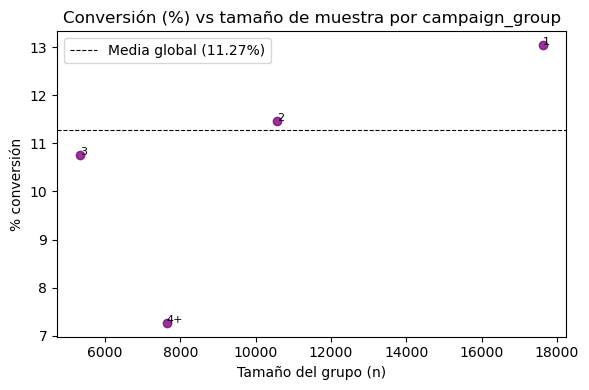

In [159]:
# Agrupación del número de contactos "campaign" en 5 grupos
df['campaign_group'] = df['campaign'].apply(lambda x: str(x) if x <= 3 else "4+")
                                                            

# Llamamos a nuestras funciones de los gráficos
fun.graficar_barras_resultado_por_categoria(
    df, "campaign_group", target = "y", titulo = "Distribución de las contrataciones según nº de contactos en campaña actual")
fun.scatter_conversion_vs_size(df,'campaign_group', point_color='purple')

**Interpretación del resultado: Conversión ("y") vs nº de contactos realizados durante la campaña actual ("campaign") con la media global**

**¿Qué se observa?**
- La variable `campaign`, que recoge el número de contactos realizados durante la campaña actual, muestra una relación claramente negativa y progresiva con la conversión. Los clientes contactados **una sola vez** presentan la mayor tasa de contratación y combina, además, un elevado tamaño muestral. A partir del segundo contacto, la conversión disminuye de forma sostenida, siendo especialmente baja en los grupos con cinco o más intentos.
- Este comportamiento sugiere la existencia de rendimientos decrecientes en la repetición de contactos dentro de una misma campaña.

**Lectura lógica (por qué puede pasar):**
- Este patrón suele indicar **“fatiga / baja cualificación”**: cuando una persona necesita muchos intentos, normalmente es porque **no estaba interesada** o **no encajaba bien** desde el principio.
- Importante: `campaign` **no es una acción causal limpia** (no significa que “llamar más empeora”). Más bien refleja una **decisión operativa**: los casos difíciles reciben más contactos.

**Conclusión rápida:**
- Hay una **relación negativa**: a más contactos (sobre todo **4+**), **menor conversión**.
- `campaign_group` parece una variable **muy informativa** para segmentación y el modelo.

**Nota importante:**
- El número de contactos es una variable dependiente del proceso de campaña y no una característica intrínseca del cliente. Los grupos con mayor número de contactos corresponden, en muchos casos, a clientes que no convirtieron en intentos previos, lo que introduce un efecto de selección. Por ello, esta relación no debe interpretarse como causal directa, sino como un patrón operativo.

**Idea accionable (si esto fuera una campaña):**
- Definir un “punto de corte” operativo: por ejemplo, **tras 3 intentos** replantear el enfoque (cambiar mensaje/canal) o pasar a nurture.
- Tratar **4+** como un segmento de **baja prioridad** o de **recuperación**, optimizando coste/tiempo del equipo.
- Complementar este gráfico con `duration` y `poutcome`: muchas veces el “éxito” real se concentra en **pocos contactos** y en perfiles que ya venían más predispuestos.

### 2.2.5 Duración de la llamada ("duration") vs contratación ("y")

In [128]:
# Distribución de la variable "duration"
df['duration'].describe()

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [129]:
df.groupby('y')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36537.0,220.868079,207.116178,0.0,95.0,164.0,279.0,4918.0
yes,4639.0,553.256090,401.190736,37.0,253.5,449.0,741.5,4199.0


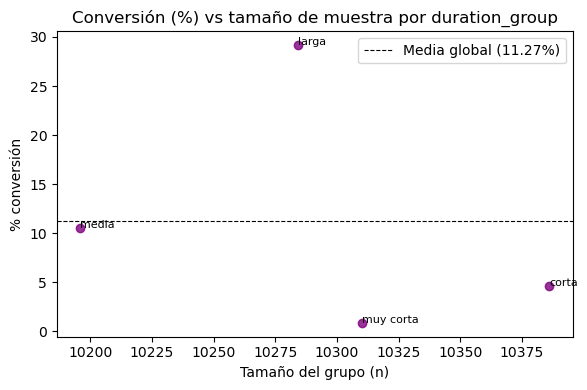

In [158]:
# Agrupación de la duración de la llamada en cuartiles
df['duration_group'] = pd.qcut(df['duration'], q=4, labels = ["muy corta", "corta", "media", "larga"])
                                                            

# Llamamos a nuestras funciones de los gráficos
fun.graficar_barras_resultado_por_categoria(
    df, "duration_group", target = "y", titulo = "Distribución de las contrataciones según la duración de la llamada")
fun.scatter_conversion_vs_size(df,'duration_group', point_color='purple')

## 2.3 Respuesta según características de la campaña anterior

### 2.3.1 Días transcurridos desde que el cliente fue contactado para la anterior campaña ("pdays") vs contratación ("y")

In [130]:
# Distribución de la variable "pdays"
df['pdays'].describe()

count    41176.000000
mean       962.464810
std        186.937102
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [131]:
# Conversión por grupos en porcentaje (separación en 2 grupos: 
# los clientes nuevos, es decir, sin contactar, y los clientes re-contactados, es decir, con contacto previo)
df.groupby(df['pdays'] == 999)['y'].value_counts(normalize=True).mul(100).round(2)

pdays  y  
False  yes    63.83
       no     36.17
True   no     90.74
       yes     9.26
Name: proportion, dtype: float64

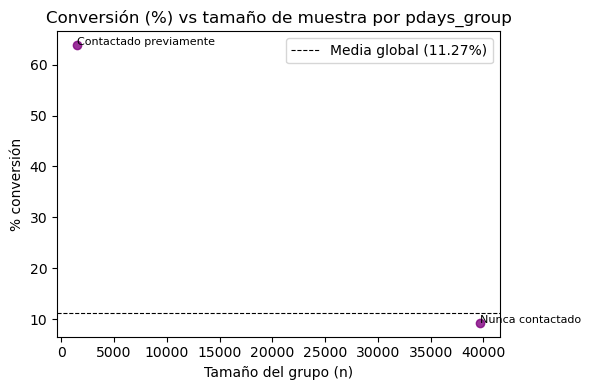

In [162]:
# Creación del 1r gráfico: Eficacia de fidelización

# Agrupación de "pdays" en 2 grupos (contactados previamente y no contactados)
df['pdays_group'] = df['pdays'].apply(lambda x: "Nunca contactado" if x == 999 else "Contactado previamente")

# Llamamos a nuestra función del gráfico
fun.graficar_barras_resultado_por_categoria(df, "pdays_group", target = "y", titulo = "Eficacia de fidelización: clientes nuevos vs re-contactados")
fun.scatter_conversion_vs_size(df,'pdays_group', point_color='purple')

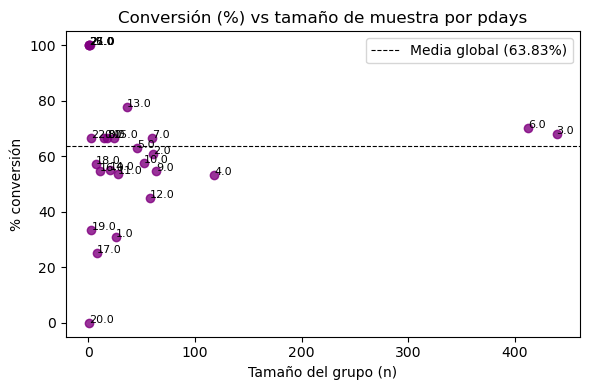

In [133]:
# Creación de los gráficos teniendo en cuenta todos los días de contacto:
# filtramos para ver a los que SI fueron contactados antes  y su conversión dependiendo de los días que han pasado desde la última llamada
df_contactados = df[df['pdays'] != 999]

fun.graficar_barras_resultado_por_categoria(df_contactados, "pdays", titulo = "Análisis desde el último día de contacto (excluyendo a los que no se contactaron)")
fun.scatter_conversion_vs_size(df_contactados,'pdays', point_color='purple')

**Interpretación del resultado: Conversión ("y") vs días transcurridos desde la última llamada ("pdays") con la media global**

**¿Qué se observa?**
- El gráfico evidencia una diferencia muy significativa en la tasa de conversión entre clientes con y sin contacto previo en campañas anteriores. Mientras que los clientes sin historial de contacto presentan una tasa de contratación inferior a la media global (9.26%), los clientes re-contactados muestran una probabilidad de conversión sustancialmente mayor( 63.83%).

**Conclusión rápida:**
- Este resultado sugiere que **el contacto previo actúa como un fuerte indicador de predisposición a la contratación**, ya sea por mayor familiaridad con el producto, mayor interés previo o un efecto de selección en campañas anteriores.
- Al analizar exclusivamente a los clientes con contacto previo, **no se identifica un patrón temporal claro entre los días transcurridos desde el último contacto (pdays) y la tasa de conversión**. Aunque se observan picos puntuales de conversión, estos están asociados a tamaños muestrales reducidos, lo que limita su capacidad explicativa.
- Este resultado sugiere que el factor determinante no es tanto la recencia exacta del contacto, sino la existencia misma de una interacción previa con el cliente.

**Nota importante:**
- Cabe destacar que esta comparación debe interpretarse con cautela, ya que la media global incluye clientes sin contacto previo, lo que refuerza aún más el carácter diferencial del segmento de clientes re-contactados.



### 2.3.2 Contactos realizados previos a la campaña actual ("previous") vs contratación ("y")

In [134]:
# Datos estadísticos de la variable "previous"
df['previous'].describe()

count    41176.000000
mean         0.173013
std          0.494964
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [ ]:
# Conversión por grupos en porcentaje
df.groupby('previous')['y'].value_counts(normalize=True).mul(100).round(2).to_frame(name='porcentaje')

porcentaje
previous y              
0        no        91.17
         yes        8.83
1        no        78.80
         yes       21.20
2        no        53.58
         yes       46.42
3        yes       59.26
         no        40.74
4        yes       54.29
         no        45.71
5        yes       72.22
         no        27.78
6        yes       60.00
         no        40.00
7        no       100.00

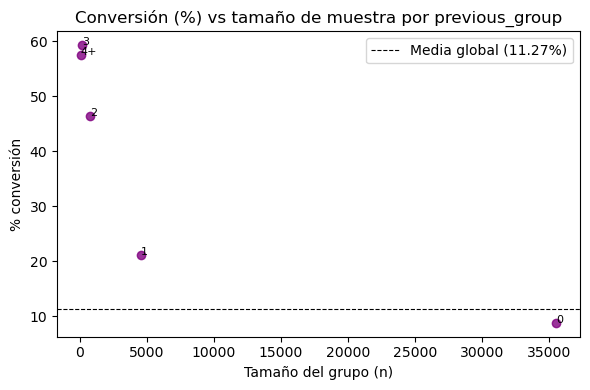

In [167]:
# Agrupación del número de contactos "p" en 5 grupos
orden_previous_group = ["0", "1", "2", "3", "4+"]
df['previous_group'] = pd.Categorical(df['previous_group'], categories = orden_previous_group, ordered = True)

# Creación de los gráficos
fun.graficar_barras_resultado_por_categoria(df, "previous_group", target="y", modo="stack", titulo = "Distribucion de contrataciones según contactos previos")
fun.scatter_conversion_vs_size(df,'previous_group', point_color='purple')

**Interpretación del resultado: Conversión ("y") vs los contactos realizado previous a la campaña actual ("previous") con la media global**

**¿Qué se observa?**
- Los clientes con al menos un contacto previo muestran tasas de conversion claramente superiores (ej: contacto previo (1) convierten un 21.20%), sin embargo los clientes sin historial de interacción previa la tasa de conversión es inferior a la media global (ej: contacto previo (0) convierten un 8.83%).

**Conclusión rápida:**
- La relación previa con el cliente actúa como un fuerte factor facilitador de la contratación.
- Aunque la tasa de conversión tiende a aumentar con el número de contactos previos (contactos > 1) para valores elevados de previous el tamaño muestral se reduce de forma significativa, generando una mayor volatilidad en los resultados. Por ello, el principal efecto relevante se concentra en la diferencia entre clientes sin contactos previos y aquellos con al menos uno.

### 2.3.3 Resultado de la campaña anterior ("poutcome") vs contratación ("y")

In [137]:
# Conversión por grupos en porcentaje
df.groupby('poutcome')['y'].value_counts(normalize=True).mul(100).round(2).to_frame(name='porcentaje')

porcentaje
poutcome    y              
failure     no        85.77
            yes       14.23
nonexistent no        91.17
            yes        8.83
success     yes       65.11
            no        34.89

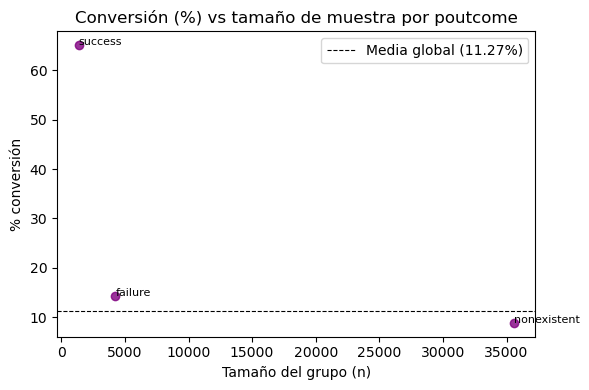

In [ ]:
# Creación de los gráficos
fun.graficar_barras_resultado_por_categoria(df, "poutcome", target="y", modo="stack", titulo = "Distribucion de contrataciones según resultado campaña anterior")
fun.scatter_conversion_vs_size(df,'poutcome', point_color='purple')

**Interpretación del resultado: conversión ("y") vs el resultado de la campaña anterior ("previous") con la media global**

**¿Qué se observa? (tasa de conversión “yes” dentro de cada categoría):**
- **success → 65.11% (894 casos)**  
  Es una conversión **muy superior** a la media global. Si una persona ya tuvo “éxito” en una campaña anterior, es mucho más probable que vuelva a contratar.
- **failure → 14.23% (605 casos)**  
  Está **ligeramente por encima** de la media global, pero lejos del nivel de “success”, lo que sugiere que el contacto previo, incluso sin éxito, aporta información y familiaridad que puede facilitar la conversión futura.
- **nonexistent → 8.83% (3141 casos)**  
  Está **por debajo** de la media global. Son clientes sin resultado previo registrado (o sin campaña previa), y su probabilidad de contratación es menor.

**Conclusión rápida:**
- `poutcome` es una de las variables más informativas: el histórico de campaña previa **marca mucha diferencia**, muestra una relación muy clara con la probabilidad de contratación en la campaña actual.
- En términos de negocio, estos resultados refuerzan la relevancia del historial de respuesta como **una de las variables más informativas para la segmentación y priorización** de acciones de marketing, siendo especialmente estratégico el segmento "poutcome = success" como grupo de alto potencial.

**Nota importante (para no interpretar mal):**
- `poutcome` describe el resultado de una campaña anterior, y **no es lo mismo** que el target `y` (resultado de esta campaña).  
- La elevada tasa de conversión del segmento "poutcome = success" puede deberse tanto a que estos clientes tienen una mayor predisposición natural a contratar como a que, en campañas anteriores, ya fueron seleccionados por tener un perfil más favorable. Por este motivo, su efecto debe analizarse conjuntamente con otras variables del cliente.

## 2.4 Preparación de variables para análisis de asociación

In [ ]:

# Agrupación de "pdays" en 2 grupos (contactados previamente y no contactados)
df['pdays_group'] = df['pdays'].apply(lambda x: "Nunca contactado" if x == 999 else "Contactado previamente")


## 2.5. Análisis de asociación entre variables y la contratación

Para evaluar la existencia de asociación entre las variables categóricas y la contratación del deposito, utilizaremos tablas de contingencia. Adicionalmente, calcularemos el estadístico **Cramér's V** como medida de la fuerza de la asociación.

In [140]:
variables_a_analizar = [
    "age_group",
    "job",
    "education",
    "marital",
    "default",
    "housing",
    "loan",
    "contact",
    "month",
    "day_of_week",
    "campaign_group",
    "duration_group",
    "pdays_group",
    "previous",
     "poutcome",
]

tabla_resultados = fun.tabla_chi2_cramersv(
    df=df,
    target="y",
    variables=variables_a_analizar
)

tabla_resultados


,variable,chi2_p_value,cramers_v
11,duration_group,0.0000,0.344
12,pdays_group,0.0000,0.325
14,poutcome,0.0000,0.321
8,month,0.0000,0.275
13,previous,0.0000,0.236
0,age_group,0.0000,0.167
1,job,0.0000,0.153
7,contact,0.0000,0.145
4,default,0.0000,0.099
2,education,0.0000,0.068


# Análisis de datos macroeconómicos vs target

In [141]:
macro_cols = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

df_macro = df[macro_cols + ["y", "month"]].copy()

In [142]:
df_macro[macro_cols].describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,1.570883,0.578839,4.627860,1.734437,72.251364
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [143]:
df_macro[macro_cols].nunique().sort_values()

emp.var.rate       10
nr.employed        11
cons.conf.idx      26
cons.price.idx     26
euribor3m         316
dtype: int64

In [144]:
df_macro.groupby("month")[macro_cols].mean()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
month,,,,,
mar,-1.800000,93.097330,-42.650549,1.162745,5055.390110
apr,-1.800000,93.119575,-46.273318,1.361047,5093.121437
may,-0.164945,93.528894,-40.579168,3.293696,5149.522242
jun,0.688379,94.245402,-41.579428,4.256908,5197.493193
jul,1.159353,93.895109,-42.371209,4.686026,5214.089985
aug,0.746940,93.311022,-35.597021,4.300408,5200.239330
sep,-2.177368,93.346474,-33.893158,0.834760,4988.847895
oct,-2.437238,93.176145,-34.591632,1.200762,5018.825662
nov,-0.418561,93.200944,-41.238561,3.723018,5173.025683


In [145]:
# El Euribor tiene una correlación muy positiva con la tasa de empleo; 
# a mayor tasa de empleo el tipo de interés del Euribor sube
# A mayor tasa de empleo, el IPC también sube
corr = df_macro[macro_cols].corr(method="pearson")
corr

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
emp.var.rate,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,0.906949,0.521945,0.100679,0.945146,1.000000


**Interpretación del resultado:**
- Las variables macroeconómicas analizadas muestran una elevada correlación entre sí, especialmente **euribor3m, emp.var.rate y nr.employed**, lo que indica que capturan un mismo componente del ciclo económico. Esta alta colinealidad dificulta la interpretación individual de cada variable y sugiere la existencia de un efecto macroeconómico común más que impactos aislados.
- **cons.price.idx** mantiene correlaciones moderadas con este bloque, mientras que **cons.conf.idx** presenta correlaciones bajas con el resto, aportando información más independiente.

# Asociación entre dos variables

In [146]:
# Tabla de contingencia análisis de cliente con la contratación: "age_group" e "y"
tab_cont_age_group = pd.crosstab(df['age_group'], df['y'])
tab_cont_age_group

y,no,yes
age_group,,
<=25,1316,349
26-35,13104,1740
36-45,11747,1092
46-55,7530,717
56-65,2512,451
66+,328,290


In [147]:
chi2, p_value, dof, expected_values = stats.chi2_contingency(tab_cont_age_group)

In [148]:
#p_value de "age_group" e "y"
round(p_value, 2)

np.float64(0.0)

In [149]:
# Tabla de contingencia análisis de cliente con la contratación: "job" e "y"
tab_cont_job = pd.crosstab(df['job'], df['y'])
chi2, p_value, dof, expected_values = stats.chi2_contingency(tab_cont_job)
round(p_value, 3)

np.float64(0.0)

In [150]:
# Tabla de contingencia análisis de cliente con la contratación: "marital" e "y"
tab_cont_marital = pd.crosstab(df['marital'], df['y'])
chi2, p_value, dof, expected_values = stats.chi2_contingency(tab_cont_marital)
round(p_value, 3)

np.float64(0.0)

In [151]:
# Tabla de contingencia análisis de cliente con la contratación: "education" e "y"
tab_cont_education = pd.crosstab(df['education'], df['y'])
chi2, p_value, dof, expected_values = stats.chi2_contingency(tab_cont_education)
round(p_value, 3)

np.float64(0.0)

In [152]:
# Tabla de contingencia análisis de cliente con la contratación: "default" e "y"
tab_cont_default = pd.crosstab(df['default'], df['y'])
chi2, p_value, dof, expected_values = stats.chi2_contingency(tab_cont_default)
round(p_value, 3)

np.float64(0.0)

In [153]:
# Tabla de contingencia análisis de cliente con la contratación: "housing" e "y"
tab_cont_housing = pd.crosstab(df['housing'], df['y'])
chi2, p_value, dof, expected_values = stats.chi2_contingency(tab_cont_housing)
round(p_value, 3)

np.float64(0.057)

In [154]:
# Tabla de contingencia análisis de cliente con la contratación: "loan" e "y"
tab_cont_loan = pd.crosstab(df['loan'], df['y'])
chi2, p_value, dof, expected_values = stats.chi2_contingency(tab_cont_loan)
round(p_value, 3)

np.float64(0.577)

In [155]:
pd.crosstab(
    [df["job"], df["education"]],
    df["y"],
    normalize="index"
)


y                                  no       yes
job     education                              
admin.  basic.4y             0.870130  0.129870
        basic.6y             0.947020  0.052980
        basic.9y             0.915832  0.084168
        high.school          0.885251  0.114749
        illiterate           1.000000  0.000000
...                               ...       ...
unknown basic.9y             0.967742  0.032258
        high.school          0.945946  0.054054
        professional.course  0.916667  0.083333
        university.degree    0.755556  0.244444
        unknown              0.870229  0.129771

[90 rows x 2 columns]

In [156]:
pd.crosstab(
    [df["education"], df["age_group"]],
    df["y"],
    normalize="index"
)

y                                    no       yes
education           age_group                    
basic.4y            <=25       0.847222  0.152778
                    26-35      0.940989  0.059011
                    36-45      0.955575  0.044425
                    46-55      0.944072  0.055928
                    56-65      0.847920  0.152080
                    66+        0.491409  0.508591
basic.6y            <=25       0.731707  0.268293
                    26-35      0.917574  0.082426
                    36-45      0.928429  0.071571
                    46-55      0.916488  0.083512
                    56-65      0.956897  0.043103
                    66+        0.555556  0.444444
basic.9y            <=25       0.874214  0.125786
                    26-35      0.916628  0.083372
                    36-45      0.942231  0.057769
                    46-55      0.922518  0.077482
                    56-65      0.887417  0.112583
                    66+        0.741935  0.258065
high.school         <=25       0.796610  0.203390
                    26-35      0.888771  0.111229
                    36-45      0.918854  0.081146
                    46-55      0.914724  0.085276
                    56-65      0.836910  0.163090
                    66+        0.551724  0.448276
illiterate          26-35      0.666667  0.333333
                    36-45      0.833333  0.166667
                    46-55      0.857143  0.142857
                    56-65      1.000000  0.000000
                    66+        0.000000  1.000000
professional.course <=25       0.808642  0.191358
                    26-35      0.878456  0.121544
                    36-45      0.916031  0.083969
                    46-55      0.908124  0.091876
                    56-65      0.829132  0.170868
                    66+        0.522388  0.477612
university.degree   <=25       0.755102  0.244898
                    26-35      0.857752  0.142248
                    36-45      0.878892  0.121108
                    46-55      0.883532  0.116468
                    56-65      0.834805  0.165195
                    66+        0.651685  0.348315
unknown             <=25       0.596899  0.403101
                    26-35      0.852507  0.147493
                    36-45      0.911985  0.088015
                    46-55      0.935484  0.064516
                    56-65      0.835498  0.164502
                    66+        0.428571  0.571429

# Transformación del dataset para la creación del modelo

In [157]:
pd.get_dummies(df, columns=["age_group",], drop_first=True)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,nr.employed,y,campaign_group,pdays_group,duration_group,age_group_26-35,age_group_36-45,age_group_46-55,age_group_56-65,age_group_66+
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,5191.0,no,1,Nunca contactado,media,False,False,False,True,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,5191.0,no,1,Nunca contactado,corta,False,False,False,True,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,5191.0,no,1,Nunca contactado,media,False,True,False,False,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,5191.0,no,1,Nunca contactado,corta,False,True,False,False,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,5191.0,no,1,Nunca contactado,media,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,4963.6,yes,1,Nunca contactado,larga,False,False,False,False,True
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,4963.6,no,1,Nunca contactado,larga,False,False,True,False,False
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,4963.6,no,2,Nunca contactado,media,False,False,False,True,False
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,4963.6,yes,1,Nunca contactado,larga,False,True,False,False,False
